In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv(r"E:\Dev_space\Python\JNotebook\GroceryStoreAnalysis\GroceryDataset.csv")
df.head(10)

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
5,Bakery & Desserts,$59.99,No Discount,Rated 4.4 out of 5 stars based on 369 reviews.,David's Cookies Mango & Strawberry Cheesecake ...,$,2-count\nStrawberry Cheesecake\nMango Cheeseca...,Strawberry Cheesecake: There's only one way to...
6,Bakery & Desserts,$74.99,No Discount,Rated 4.7 out of 5 stars based on 2241 reviews.,"La Grande Galette French Butter Cookies, 1.3 l...",$,"1.3 lb, 6-count\nBaked in, and Imported from, ...",Once upon a time in the French coastal town of...
7,Bakery & Desserts,$59.99,No Discount,Rated 4.4 out of 5 stars based on 232 reviews.,David's Cookies No Sugar Added Cheesecake & Ma...,$,2-count\nNo Sugar Added\nKosher OU-Dairy,Creamy Dreamy:This smooth creamy cheesecake ha...
8,Bakery & Desserts,$29.99,No Discount,Rated 4.4 out of 5 stars based on 1679 reviews.,David's Cookies Brownie and Cookie Combo Pack,$,6 Rocky Road Brownies\n12 Chocoloate Chunk Coo...,Due to the perishable nature of this product o...
9,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 2 reviews.,"The Cake Bake Shop 8"" Round Chocolate Cake (16...",$,3 Layers of French Valrhona Chocolate Cake M...,"Due to the perishable nature of this item, ord..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sub Category         1757 non-null   object
 1   Price                1754 non-null   object
 2   Discount             1757 non-null   object
 3   Rating               682 non-null    object
 4   Title                1757 non-null   object
 5   Currency             1752 non-null   object
 6   Feature              1739 non-null   object
 7   Product Description  1715 non-null   object
dtypes: object(8)
memory usage: 109.9+ KB


In [9]:
df['Price'].unique()

array(['$56.99 ', '$159.99 ', '$44.99 ', '$39.99 ', '$59.99 ', '$74.99 ',
       '$29.99 ', '$62.99 ', '$299.99 ', '$54.99 ', '$89.99 ', '$49.99 ',
       '$99.99 ', '$24.99 ', '$72.99 ', '$119.99 ', '$109.99 ', '$34.99 ',
       '$27.99 ', '$21.99 ', '$20.99 ', '$19.99 ', '$439.99 ', '$9.99 ',
       '$14.99 ', '$18.99 ', '$21.49 ', '$17.99 ', '$23.99 ', '$4.99 ',
       '$12.99 ', '$32.99 ', '$13.79 ', '$23.49 ', '$22.99 ', '$8.99 ',
       '$15.99 ', '$28.99 ', '$16.49 ', '$549.99 ', '$17.49 ', '$25.99 ',
       '$11.69 ', '$69.99 ', '$21.79 ', '$37.99 ', '$139.99 ', '$41.99 ',
       '$18.49 ', '$16.99 ', '$36.99 ', '$10.99 ', '$61.99 ', '$17.59 ',
       '$11.99 ', '$24.49 ', '$10.49 ', '$9.69 ', '$8.19 ', '$9.49 ',
       '$12.49 ', '$12.69 ', '$31.99 ', '$15.49 ', '$46.99 ', '$11.49 ',
       '$16.39 ', '$13.99 ', '$38.99 ', '$26.99 ', '$13.49 ', '$14.49 ',
       '$26.69 ', '$42.99 ', '$45.99 ', '$7.99 ', '$25.69 ', '$19.49 ',
       '$12.09 ', '$10.79 ', '$17.89 ', '$28.79 ', 

As we can see, we have a price range in wich I will calculate the average of the range to get an unique price

In [16]:
def range_to_average_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('$', '').replace(',', '').strip()
        price_str = price_str.replace('through', '').replace('$', '').replace(',', '').strip()
    else:
        return price_str

    if '-' in price_str:
        low, high = price_str.split('-')
        return (float(low) + float(high)) / 2
    else:
        return float(price_str)

In [18]:
df['Price'] = df['Price'].apply(range_to_average_price)
df['Price'].unique()

array([  56.99,  159.99,   44.99,   39.99,   59.99,   74.99,   29.99,
         62.99,  299.99,   54.99,   89.99,   49.99,   99.99,   24.99,
         72.99,  119.99,  109.99,   34.99,   27.99,   21.99,   20.99,
         19.99,  439.99,    9.99,   14.99,   18.99,   21.49,   17.99,
         23.99,    4.99,   12.99,   32.99,   13.79,   23.49,   22.99,
          8.99,   15.99,   28.99,   16.49,  549.99,   17.49,   25.99,
         11.69,   69.99,   21.79,   37.99,  139.99,   41.99,   18.49,
         16.99,   36.99,   10.99,   61.99,   17.59,   11.99,   24.49,
         10.49,    9.69,    8.19,    9.49,   12.49,   12.69,   31.99,
         15.49,   46.99,   11.49,   16.39,   13.99,   38.99,   26.99,
         13.49,   14.49,   26.69,   42.99,   45.99,    7.99,   25.69,
         19.49,   12.09,   10.79,   17.89,   28.79,   84.99,   58.49,
         20.89,    9.79,   29.89,  199.99,   47.99,   18.39,   43.99,
         33.99,   28.49,   10.29,   35.99,   48.99,   29.69,    6.59,
        149.99,  649

Price distribution

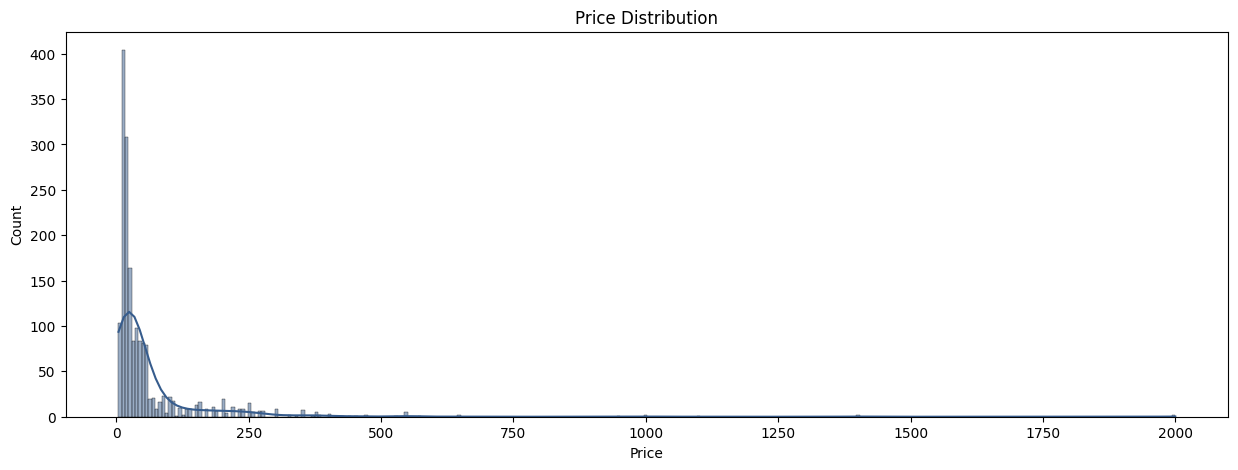

In [19]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="Price", kde=True, color=sns.color_palette("viridis")[1])
plt.title("Price Distribution")
plt.show()

In [20]:
mode = df['Price'].mode()[0]
mean = df['Price'].mean()
median = df['Price'].median()

print(f'Mode: {mode}')
print(f'Median: {median}')
print(f'Mean: {mean}')

Mode: 14.99
Median: 23.99
Mean: 61.29259977194983


Price by sub-category

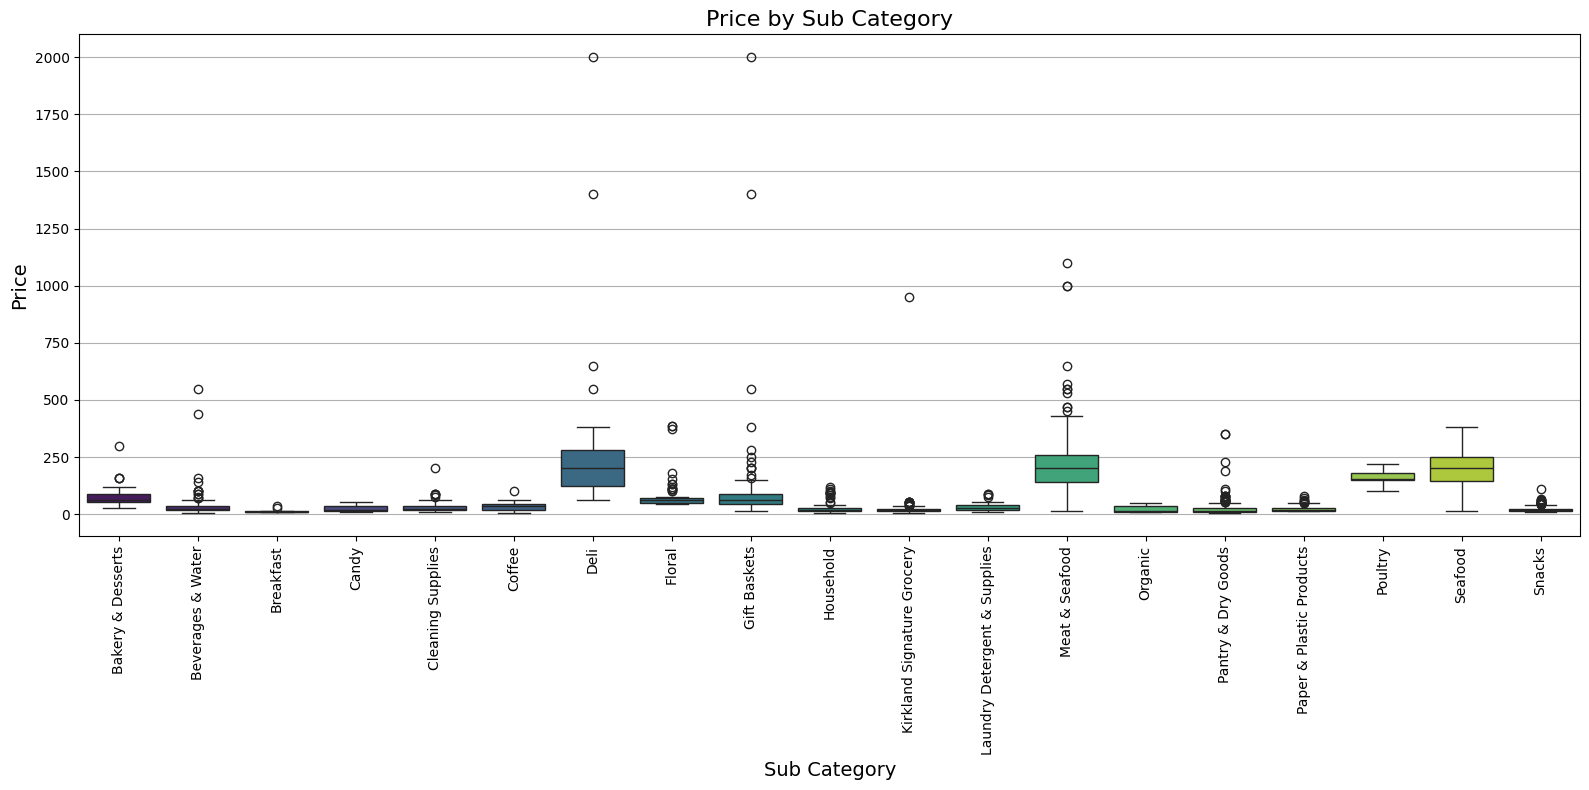

In [21]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Sub Category', y='Price', data=df, palette='viridis')

plt.xticks(rotation=90)
plt.xlabel('Sub Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price by Sub Category', fontsize=16)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Quantity by sub-category

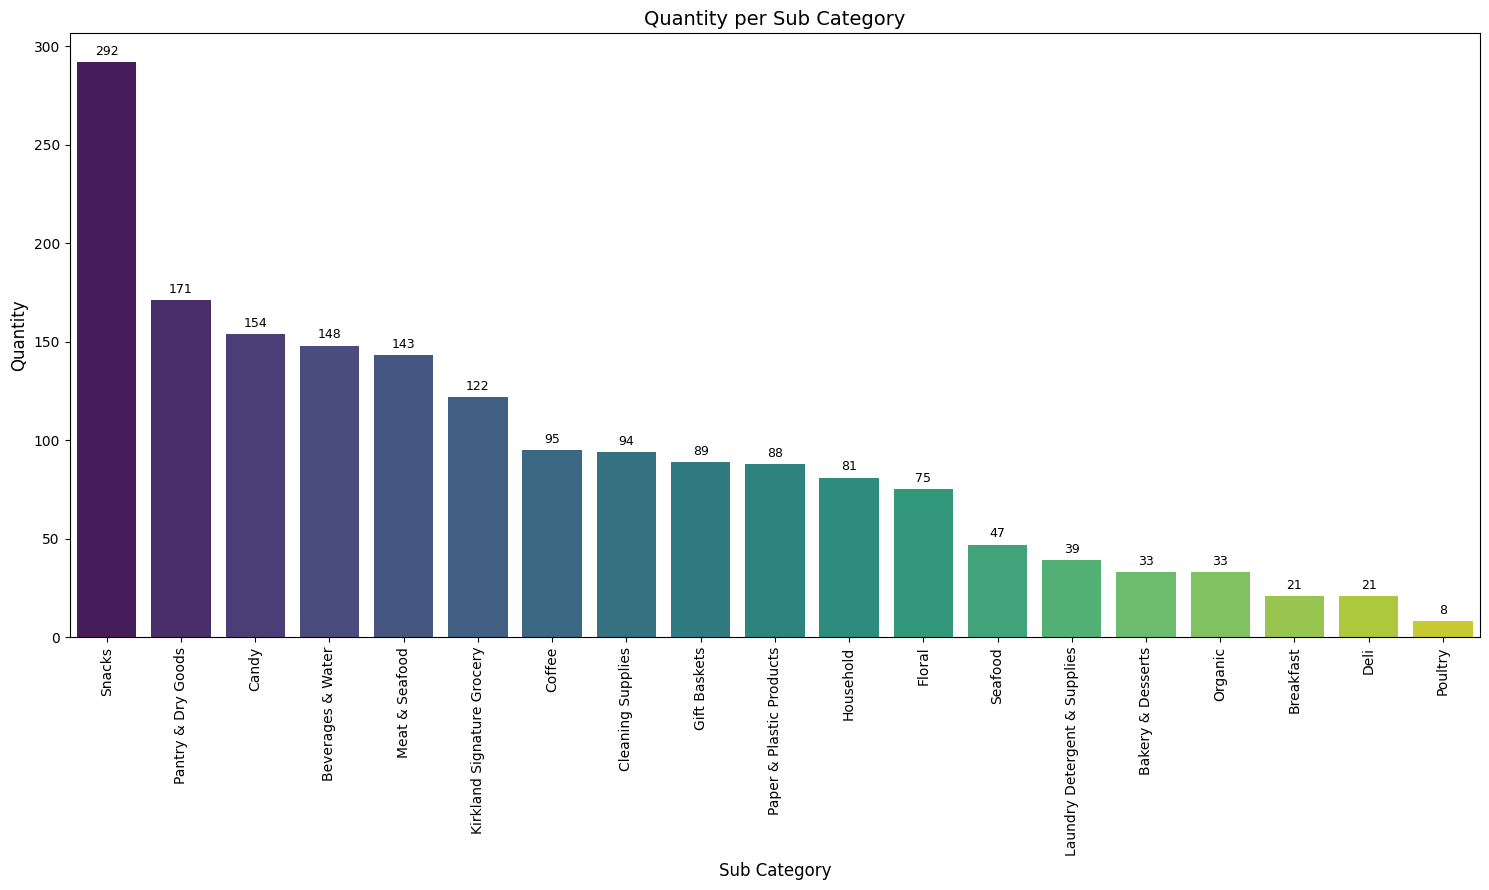

In [22]:
total_per_subcategory = df.groupby('Sub Category')['Price'].count().reset_index()

total_per_subcategory = total_per_subcategory.rename(columns={'Price': 'Quantity'})

sorted_subcategories_by_quantity = total_per_subcategory.sort_values('Quantity', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(data=sorted_subcategories_by_quantity, x='Sub Category', y='Quantity', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity per Sub Category', fontsize=14)

plt.tight_layout()

plt.show()

Total sell by sub-category

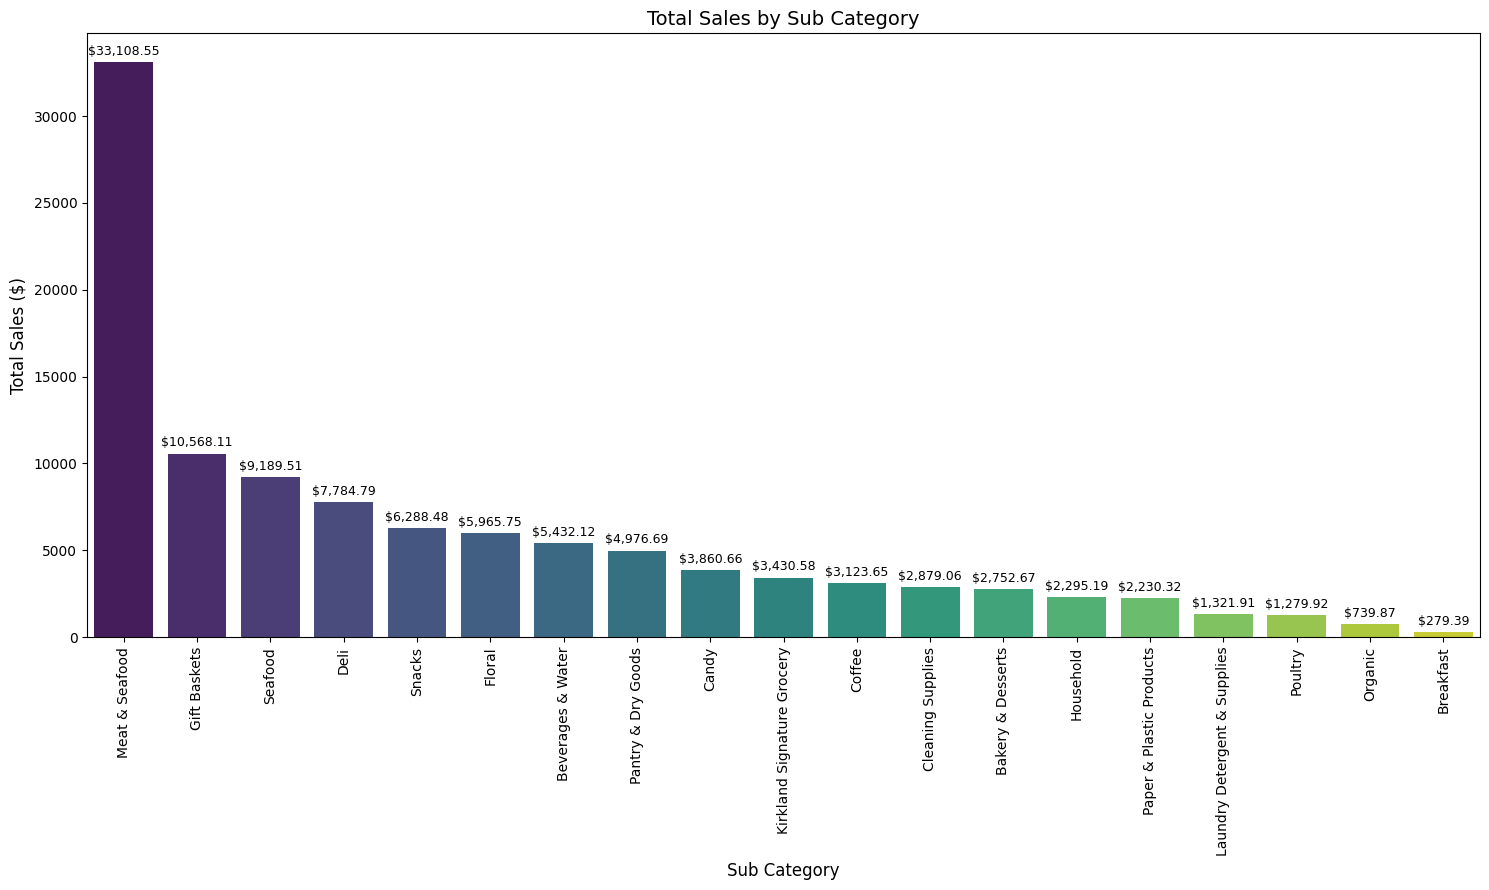

In [23]:
total_sales_per_subcategory = df.groupby('Sub Category')['Price'].sum().reset_index()

sorted_subcategories_by_sales = total_sales_per_subcategory.sort_values('Price', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(data=sorted_subcategories_by_sales, x='Sub Category', y='Price', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'${bar.get_height():,.2f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Total Sales by Sub Category', fontsize=14)

plt.tight_layout()

plt.show()

In [24]:
representation = df.groupby('Sub Category')['Price'].count()

In [25]:
representation = df.groupby(['Sub Category']).agg(
        Quantity=pd.NamedAgg(column='Price', aggfunc='count'),
        Price=pd.NamedAgg(column='Price', aggfunc='sum')
    )

In [26]:
representation['%Representation'] = (representation['Price'].astype(int)/int(sum(representation['Price'])))*100

In [27]:
representation = representation.sort_values('%Representation', ascending=False).reset_index()

In [28]:
representation

,Sub Category,Quantity,Price,%Representation
0,Meat & Seafood,143,33108.55,30.796134
1,Gift Baskets,89,10568.11,9.830058
2,Seafood,47,9189.51,8.547350
3,Deli,21,7784.79,7.240459
4,Snacks,292,6288.48,5.848921
5,Floral,75,5965.75,5.548476
6,Beverages & Water,148,5432.12,5.052694
7,Pantry & Dry Goods,171,4976.69,4.628536
8,Candy,154,3860.66,3.590464
9,Kirkland Signature Grocery,122,3430.58,3.190490


Identifying the top 20% most significant:
- Snacks
- Pantry & Dry Goods
- Meat & Seafood

Strategies to optimize the top 20% most significant:
- Highlighting these products in the store.
- Offering promotions and discounts.
- Creating attractive displays.
- Advertising these products.

Considering the bottom 80% less important:
- Analyze if it's worth keeping these products in stock.
- Seek ways to increase sales of these products.
- Discontinue unprofitable products.

Recommendations:
- Focus your efforts on the top 20% of products that generate the majority of sales.
- Monitor the sales of the bottom 80% less important to identify improvement opportunities.
- Regularly analyze sales data to make strategic decisions.

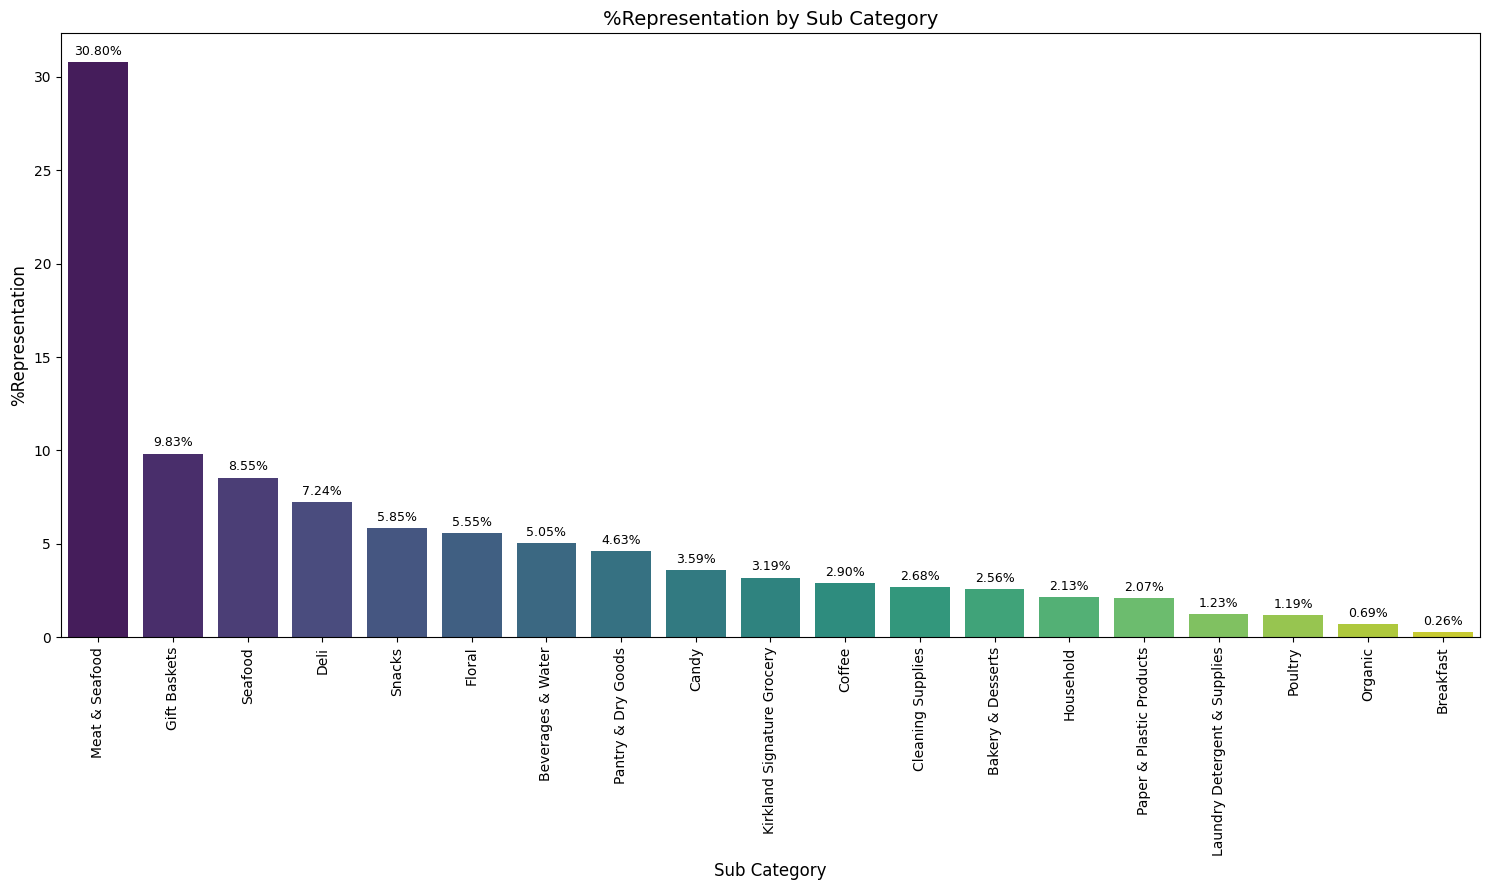

In [29]:
plt.figure(figsize=(15, 9))
ax = sns.barplot(data=representation, x='Sub Category', y='%Representation', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.2f}%',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('%Representation', fontsize=12)
plt.title('%Representation by Sub Category', fontsize=14)

plt.tight_layout()

plt.show()